In [1]:
from collections import defaultdict

# import third party libraries
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import torch

# import local libraries
from src.model import compute_Wasserstein_distance
from src.utils import (
    create_random_connected_graph,
    add_random_edges,
    add_random_nodes,
    create_graph_type_cycle,
)
from src.vizualisation import (
    create_video,
    draw_graphs_with_edge_color,
    create_video_soft,
)

# Basic example to test our model

## Create and Visualize the data

Instead of using Network x, we've decided to implemente ourself standart methods

In [2]:
# create cycle graph with 4 nodes
G1 = nx.cycle_graph(6)

# create cycle graph with 8 nodes
G2 = nx.cycle_graph(8)

# create path graph with 8 nodes
G3 = nx.path_graph(8)

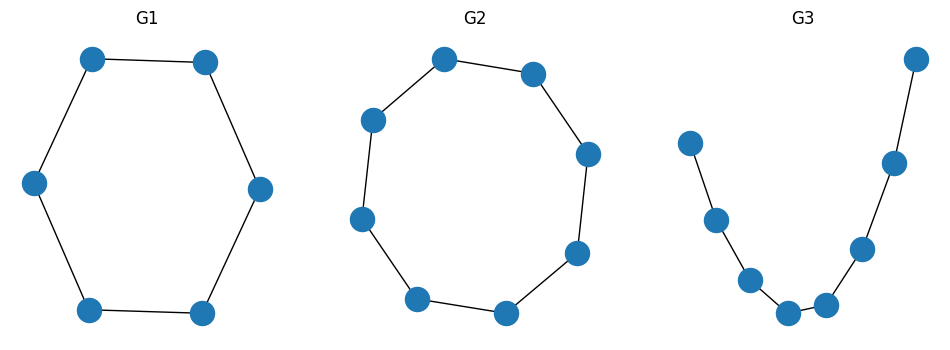

In [3]:
# display G1, G2, G3 in subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
nx.draw(G1, ax=ax[0])
nx.draw(G2, ax=ax[1])
nx.draw(G3, ax=ax[2])
# add title to figure
ax[0].set_title("G1")
ax[1].set_title("G2")
ax[2].set_title("G3")
plt.show()

## G1 and G2,  without scheduler, normal initialization

iteration 0    the Wasserstein distance is 45.72595229160998
iteration 100    the Wasserstein distance is 0.7648875569454348
iteration 200    the Wasserstein distance is 0.14388469121589226
iteration 300    the Wasserstein distance is 0.10360837881296821
iteration 400    the Wasserstein distance is 0.092454557119739
iteration 500    the Wasserstein distance is 0.0687209981657988
iteration 600    the Wasserstein distance is 0.05267103755315557
iteration 700    the Wasserstein distance is 0.04731496669605093
iteration 800    the Wasserstein distance is 0.027805849555242367
iteration 900    the Wasserstein distance is 0.027338055353423485


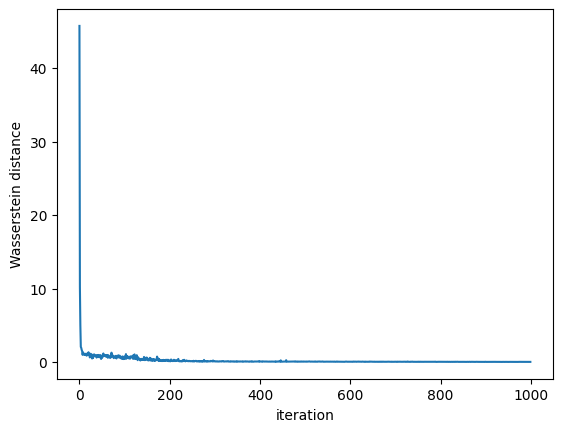

In [4]:
cfg = {
    "S": 5,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 2,
}


eta, sigma, list_cost, list_matrix_P = compute_Wasserstein_distance(G1, G2, cfg, True)

plt.plot(list_cost)
plt.xlabel("iteration")
plt.ylabel("Wasserstein distance")

plt.show()

## G1 and G2,  without scheduler, Xavier initialization

iteration 0    the Wasserstein distance is 289.53030042494754
iteration 100    the Wasserstein distance is 1.0491223247919084
iteration 200    the Wasserstein distance is 1.0580512655987708
iteration 300    the Wasserstein distance is 0.7768878922475031
iteration 400    the Wasserstein distance is 0.9600755403501331
iteration 500    the Wasserstein distance is 0.5837233540431288
iteration 600    the Wasserstein distance is 0.48306990689326923
iteration 700    the Wasserstein distance is 0.41247895835804105
iteration 800    the Wasserstein distance is 0.5824757014757244
iteration 900    the Wasserstein distance is 0.42010002435850424


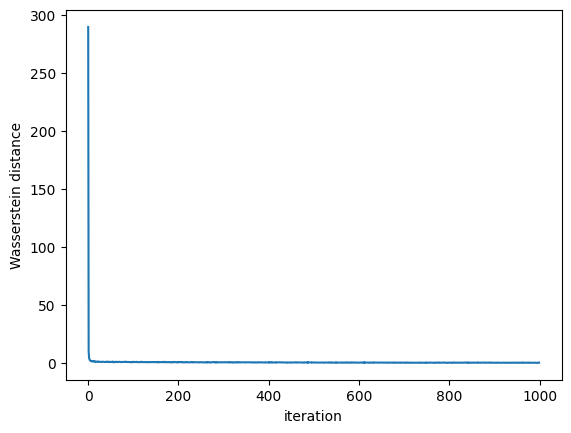

In [6]:
cfg = {
    "S": 10,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 2,
}


eta, sigma, list_cost, list_matrix_P = compute_Wasserstein_distance(
    G1, G2, cfg, True, False, True
)

plt.plot(list_cost)
plt.xlabel("iteration")
plt.ylabel("Wasserstein distance")

plt.show()

## G1 and G2, with scheduler, Xavier initialization

iteration 0    the Wasserstein distance is 21.65463526641266
iteration 100    the Wasserstein distance is 0.4025984676941839
iteration 200    the Wasserstein distance is 0.14238182113068118
iteration 300    the Wasserstein distance is 0.05982003283299271
iteration 400    the Wasserstein distance is 0.02646629089640351
iteration 500    the Wasserstein distance is 0.020346665275796916
iteration 600    the Wasserstein distance is 0.015077605110691384
iteration 700    the Wasserstein distance is 0.008425673768026077
iteration 800    the Wasserstein distance is 0.009581215040417757
iteration 900    the Wasserstein distance is 0.0069900195283608465


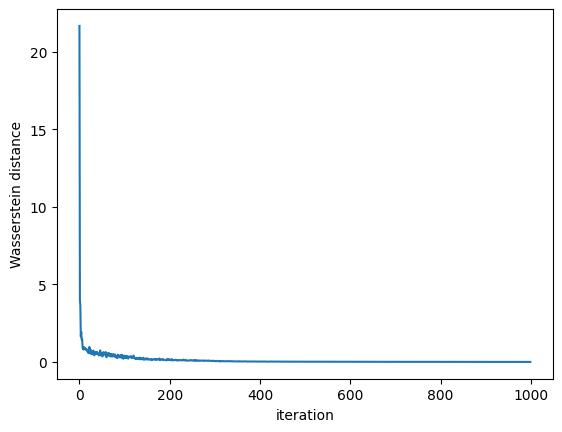

In [7]:
cfg = {
    "S": 10,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 2,
}


eta, sigma, list_cost, list_matrix_P = compute_Wasserstein_distance(
    G1, G2, cfg, True, True
)

plt.plot(list_cost)
plt.xlabel("iteration")
plt.ylabel("Wasserstein distance")

plt.show()

## G1 and G3,  without scheduler, normal initialization

iteration 0    the Wasserstein distance is 44.44465743428118
iteration 100    the Wasserstein distance is 0.9482193463206713
iteration 200    the Wasserstein distance is 0.7990791294208198
iteration 300    the Wasserstein distance is 0.5733584877343786
iteration 400    the Wasserstein distance is 0.3421236058561347
iteration 500    the Wasserstein distance is 0.33953982098045354
iteration 600    the Wasserstein distance is 0.33217005978041864
iteration 700    the Wasserstein distance is 0.32740448071452866
iteration 800    the Wasserstein distance is 0.32825266076794984
iteration 900    the Wasserstein distance is 0.32357358730865327


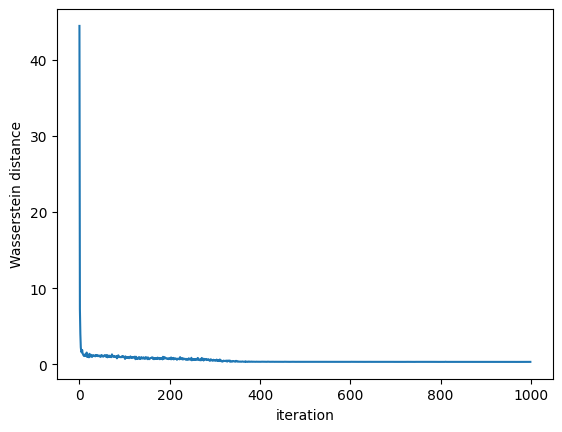

In [8]:
cfg = {
    "S": 10,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 3,
}


eta, sigma, list_cost, list_matrix_P = compute_Wasserstein_distance(G1, G3, cfg, True)

plt.plot(list_cost)
plt.xlabel("iteration")
plt.ylabel("Wasserstein distance")
plt.show()

# Experiment 1 : random graph

In [9]:
# create a graph of length 10
G1 = create_random_connected_graph(6)

# create 2 graphes by adding 3 edges to G
G2 = add_random_edges(G1, 3)

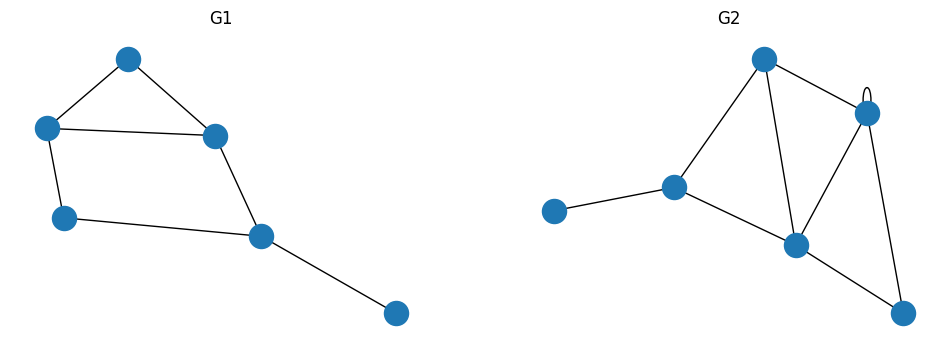

In [10]:
# plot tow graphes in subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
nx.draw(G1, ax=ax[0])
nx.draw(G2, ax=ax[1])
# add title to figure
ax[0].set_title("G1")
ax[1].set_title("G2")
plt.show()

In [13]:
cfg = {
    "S": 5,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 2,
}
eta, sigma, list_cost, list_matrix_P = compute_Wasserstein_distance(
    G1, G2, cfg, True, True
)

iteration 0    the Wasserstein distance is 31.510766305894187
iteration 100    the Wasserstein distance is 0.7750180991175637
iteration 200    the Wasserstein distance is 0.6771724328341158
iteration 300    the Wasserstein distance is 0.649976166855495
iteration 400    the Wasserstein distance is 0.5452547927015778
iteration 500    the Wasserstein distance is 0.43305376355107905
iteration 600    the Wasserstein distance is 0.4572550991075627
iteration 700    the Wasserstein distance is 0.4095446629444018
iteration 800    the Wasserstein distance is 0.40261262310914586
iteration 900    the Wasserstein distance is 0.3837199005279858


# Experiment 2 : Well-chosen graph

In [4]:
G1 = list()
G2 = list()
G3 = list()
label = list()
G3.append(create_graph_type_cycle(3, 3))
for i in range(3, 6):
    # variation of cycle
    G1.append(create_graph_type_cycle(i, 5))

    # variation of number of nodes per cycle
    G2.append(create_graph_type_cycle(3, i))

    # add random edges to G1 that don't exist and append to G3
    G3.append(add_random_edges(add_random_nodes(G3[0], 2), 2))


G1.append(nx.erdos_renyi_graph(17, 0.5))
G2.append(nx.erdos_renyi_graph(11, 0.5))
G3.pop(-1)
G3.append(nx.erdos_renyi_graph(10, 0.7))

<Figure size 600x1200 with 0 Axes>

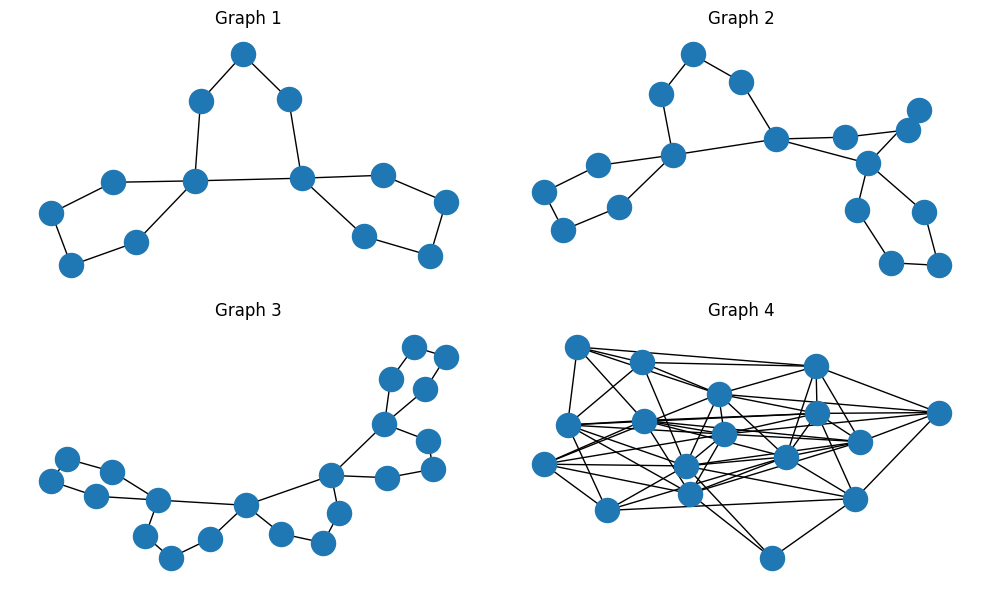

In [5]:
draw_graphs_with_edge_color(G1);

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 4,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 3,
}


dict_cost = defaultdict(list)
for _ in range(5):
    for i in range(1, len(G1)):
        for j in range(i):
            print(f"G{j} - G{i}")
            try:
                (
                    eta,
                    sigma,
                    list_cost_temp,
                    list_matrix_P,
                ) = compute_Wasserstein_distance(G1[j], G1[i], cfg, True)
                dict_cost[f"G{j} - G{i}"].append(np.median(list_cost_temp[-100:]))
            except:
                print(f"G{j} - G{i} : error")
                continue

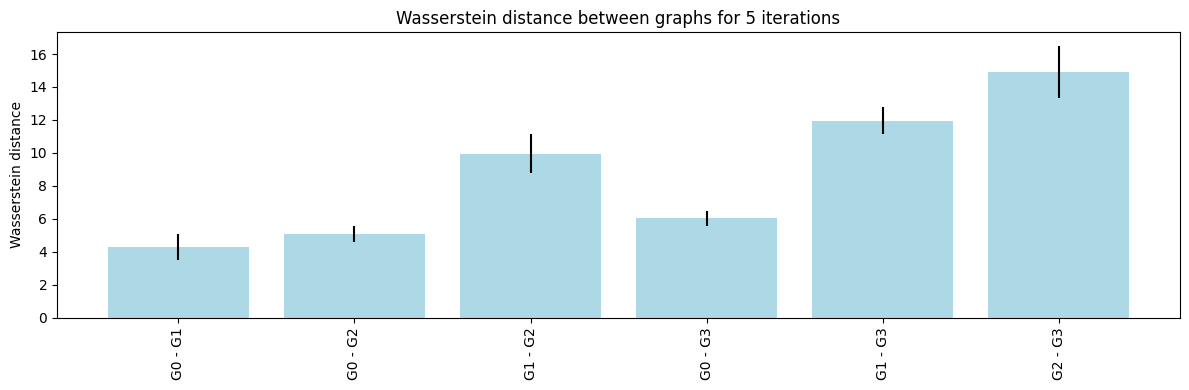

In [10]:
means = [np.mean(v) for v in dict_cost.values()]
stds = [np.std(v) for v in dict_cost.values()]

# Create the plot
plt.figure(figsize=(12, 4))
bars = plt.bar(dict_cost.keys(), means, yerr=stds, color="lightblue")

# Setting the aesthetic parameters
plt.xticks(rotation=90)
plt.ylabel("Wasserstein distance")
plt.title("Wasserstein distance between graphs for 5 iterations")
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Save the plot to a file
plt.savefig("./images/Wassertein_G1.png")
plt.show()  # Show the plot as an output

<Figure size 600x1200 with 0 Axes>

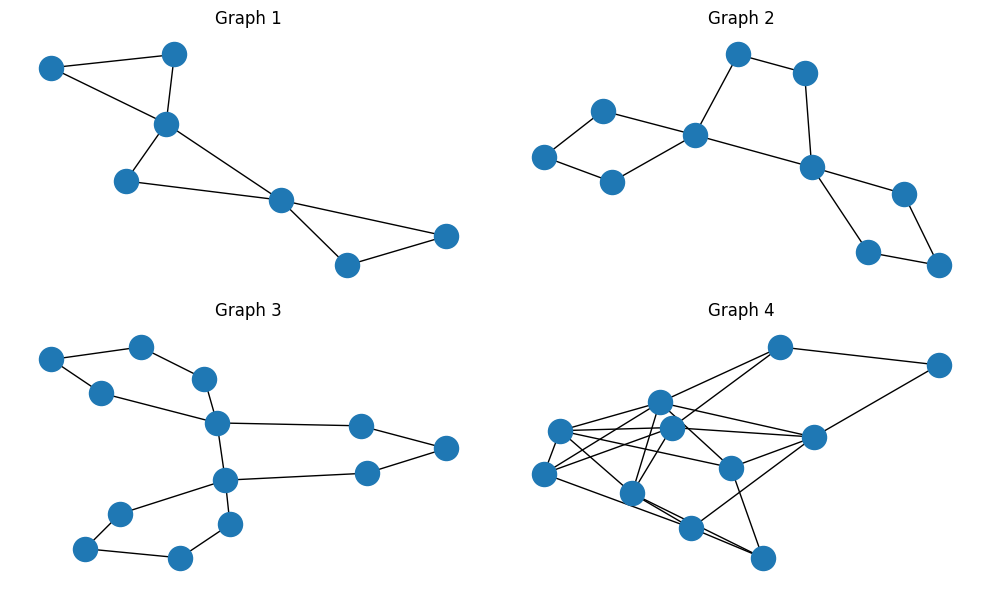

In [11]:
draw_graphs_with_edge_color(G2);

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 4,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 3,
}


dict_cost = defaultdict(list)
for _ in range(5):
    for i in range(1, len(G2)):
        for j in range(i):
            print(f"G{j} - G{i}")
            try:
                (
                    eta,
                    sigma,
                    list_cost_temp,
                    list_matrix_P,
                ) = compute_Wasserstein_distance(G2[j], G2[i], cfg, True)
                dict_cost[f"G{j} - G{i}"].append(np.median(list_cost_temp[-100:]))
            except:
                print(f"G{j} - G{i} : error")
                continue

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 4,
    "tau": 3,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1000,
    "kmax": 3,
}


dict_cost = defaultdict(list)
for _ in range(5):
    for i in range(1, len(G2)):
        for j in range(i):
            print(f"G{j} - G{i}")
            try:
                (
                    eta,
                    sigma,
                    list_cost_temp,
                    list_matrix_P,
                ) = compute_Wasserstein_distance(G2[j], G2[i], cfg, True)
                dict_cost[f"G{j} - G{i}"].append(np.median(list_cost_temp[-100:]))
            except:
                print(f"G{j} - G{i} : error")
                continue

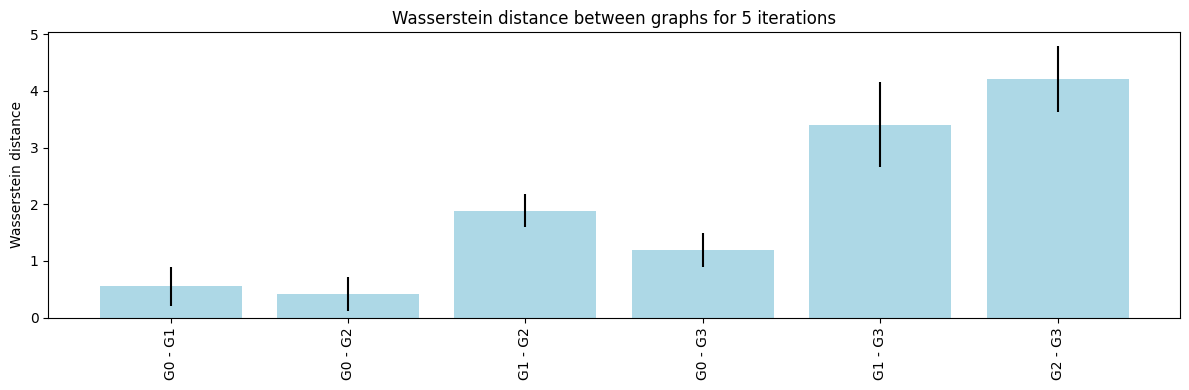

In [10]:
means = [np.mean(v) for v in dict_cost.values()]
stds = [np.std(v) for v in dict_cost.values()]

# Create the plot
plt.figure(figsize=(12, 4))
bars = plt.bar(dict_cost.keys(), means, yerr=stds, color="lightblue")

# Setting the aesthetic parameters
plt.xticks(rotation=90)
plt.ylabel("Wasserstein distance")
plt.title("Wasserstein distance between graphs for 5 iterations")
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Save the plot to a file
plt.savefig("./images/Wassertein_G2.png")
plt.show()  # Show the plot as an output

<Figure size 600x1200 with 0 Axes>

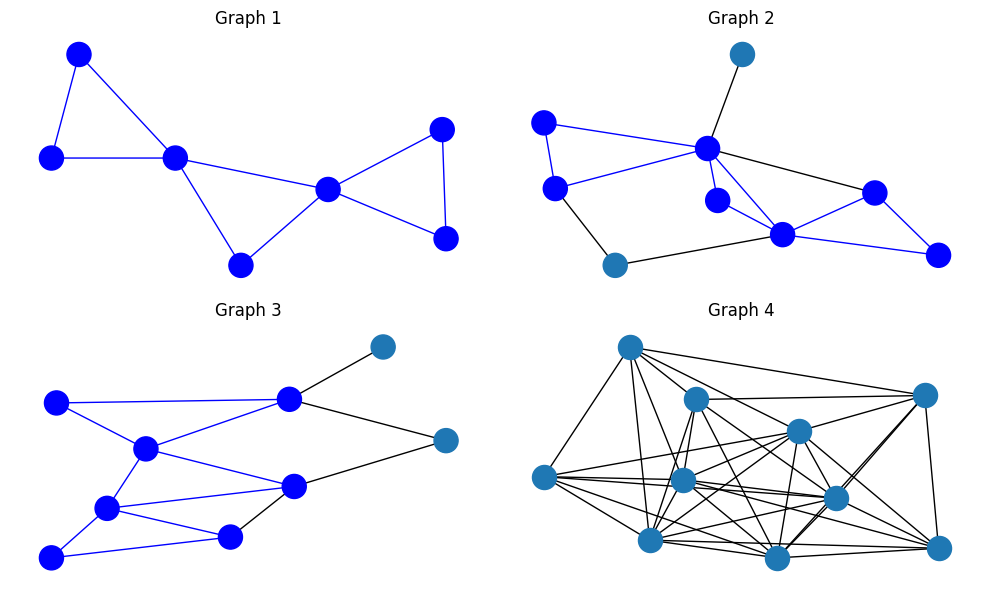

In [5]:
draw_graphs_with_edge_color(G3, True);

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 10,
    "tau": 2,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 800,
    "kmax": 2,
}
from collections import defaultdict

dict_cost = defaultdict(list)
for j in range(5):
    for i in range(1, len(G3)):
        print(f"G{0} - G{i}")
        try:
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                G3[0], G3[i], cfg, True, False, False
            )
            dict_cost[i].append(np.median(list_cost_temp[-100:]))
        except:
            print(f"G{0} - G{i} : error")
            continue

C:\Users\baptc\AppData\Local\Temp\ipykernel_15928\1694722967.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)


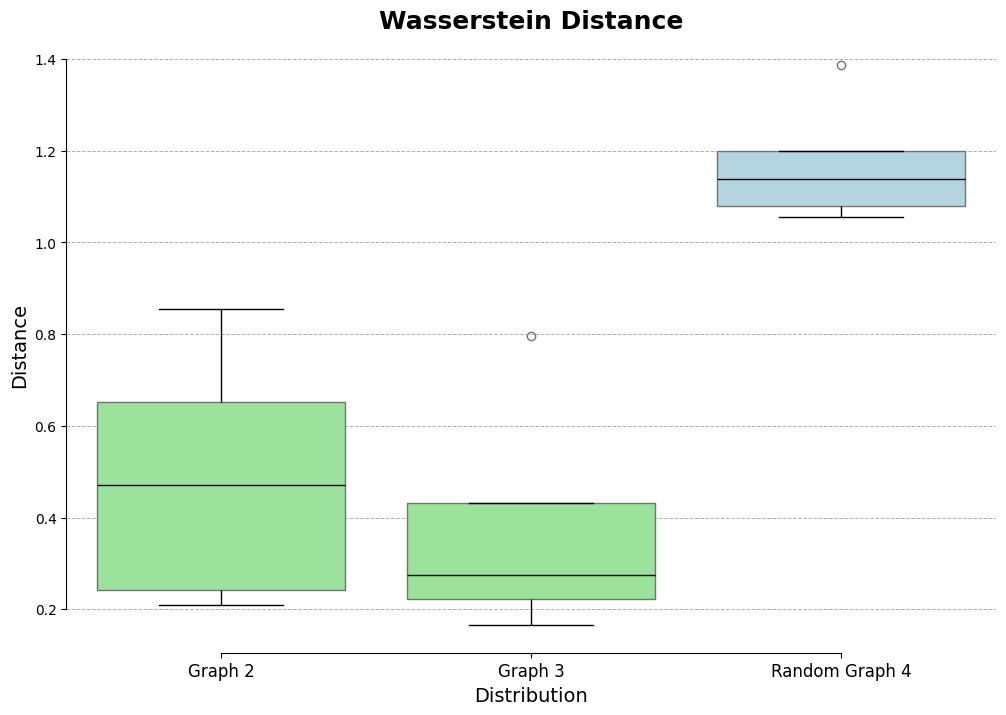

<Figure size 640x480 with 0 Axes>

In [12]:
# We will recreate the boxplot with colors for better visualization

# Define the palette to use for the boxplots
palette = ["lightgreen", "lightgreen", "lightblue"]

# We will add the specified labels to the x-axis for each boxplot

# Define the labels for each boxplot
labels = ["Graph 2", "Graph 3", "Random Graph 4"]

# Create the boxplot with colors and labels
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dict_cost, palette=palette)

# Set the labels and titles
ax.set_title("Wasserstein Distance", fontsize=18, fontweight="bold")
ax.set_xlabel("Distribution", fontsize=14)
ax.set_ylabel("Distance", fontsize=14)

# Set the x-axis labels
ax.set_xticklabels(labels, fontsize=12)

# Improve the visual presentation
sns.despine(trim=True)
plt.setp(ax.artists, edgecolor="k")  # Set the edgecolor of the box to black
plt.setp(ax.lines, color="k")  # Set the color of the whiskers to black

# Add a horizontal grid for easier comparison
plt.grid(axis="y", linestyle="--", linewidth=0.7)

# Show the final result
plt.show()
plt.savefig("./images/Wassertein_G3.png")

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 10,
    "tau": 2,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 800,
    "kmax": 2,
}
from collections import defaultdict

dict_cost = defaultdict(list)
for j in range(10):
    for i in range(1, len(G2)):
        print(f"G{0} - G{i}")
        try:
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                G2[0], G2[i], cfg, True, False, False
            )
            dict_cost[i].append(np.median(list_cost_temp[-100:]))
        except:
            print(f"G{0} - G{i} : error")
            continue

C:\Users\baptc\AppData\Local\Temp\ipykernel_13744\2283117177.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)


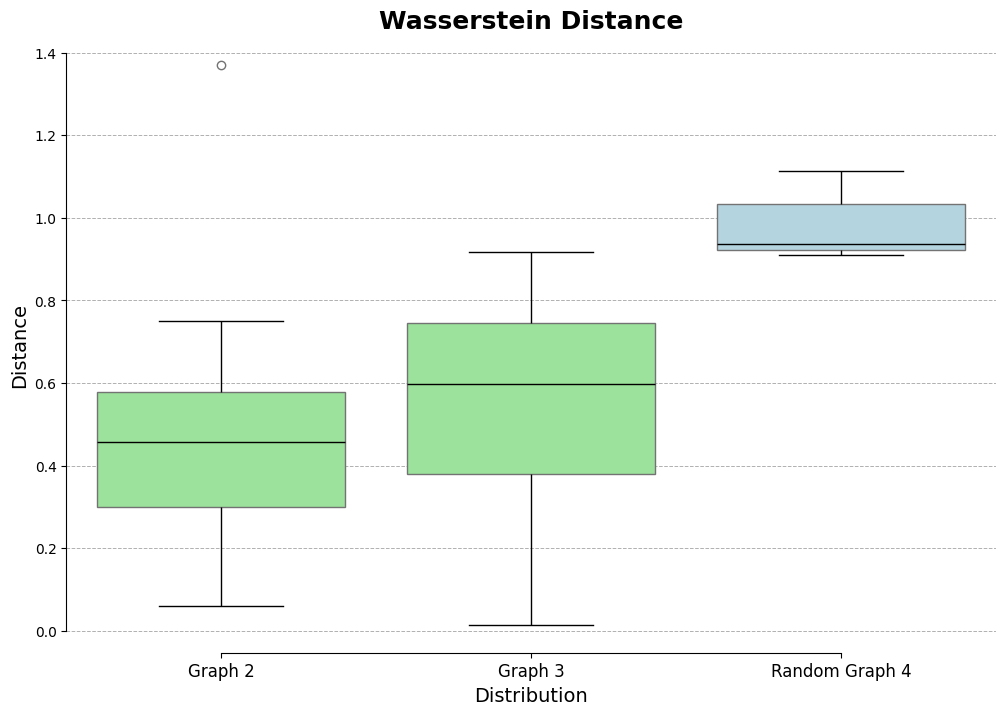

<Figure size 640x480 with 0 Axes>

In [11]:
# We will recreate the boxplot with colors for better visualization

# Define the palette to use for the boxplots
palette = ["lightgreen", "lightgreen", "lightblue"]

# We will add the specified labels to the x-axis for each boxplot

# Define the labels for each boxplot
labels = ["Graph 2", "Graph 3", "Random Graph 4"]

# Create the boxplot with colors and labels
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dict_cost, palette=palette)

# Set the labels and titles
ax.set_title("Wasserstein Distance", fontsize=18, fontweight="bold")
ax.set_xlabel("Distribution", fontsize=14)
ax.set_ylabel("Distance", fontsize=14)

# Set the x-axis labels
ax.set_xticklabels(labels, fontsize=12)

# Improve the visual presentation
sns.despine(trim=True)
plt.setp(ax.artists, edgecolor="k")  # Set the edgecolor of the box to black
plt.setp(ax.lines, color="k")  # Set the color of the whiskers to black

# Add a horizontal grid for easier comparison
plt.grid(axis="y", linestyle="--", linewidth=0.7)

# Show the final result
plt.show()
plt.savefig("./images/Wassertein_G2_v2.png")

In [2]:
# create a graph
G1 = create_graph_type_cycle(5, 10)

# create 2 graphes by adding 3 edges to G
G2 = add_random_edges(add_random_nodes(G1, 10), 5)

# create a random graph with 60 nodes
G3 = create_random_connected_graph(60)

list_graphs = [G1, G2, G3]

Text(0.5, 1.0, 'G3')

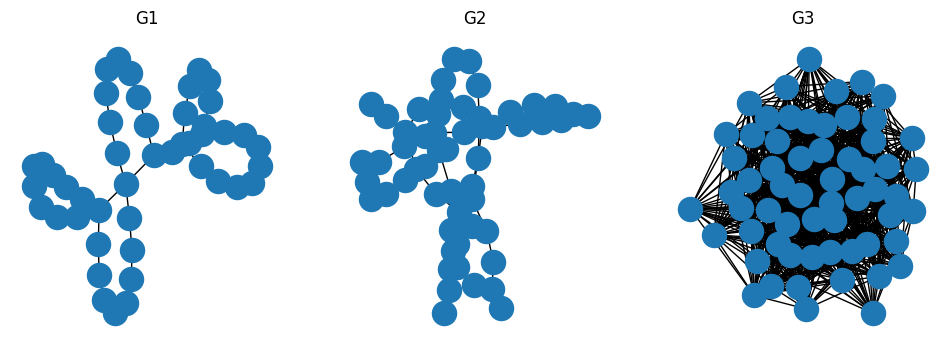

In [3]:
# plot tree graph in subplots
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
nx.draw(G1, ax=ax[0])
nx.draw(G2, ax=ax[1])
nx.draw(G3, ax=ax[2])
# add title to figure
ax[0].set_title("G1")
ax[1].set_title("G2")
ax[2].set_title("G3")

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 10,
    "tau": 2,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 800,
    "kmax": 2,
}
from collections import defaultdict

dict_cost = defaultdict(list)
for j in range(5):
    for i in range(1, len(list_graphs)):
        print(f"G{0} - G{i}")
        try:
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                list_graphs[0], list_graphs[i], cfg, True, False, False
            )
            dict_cost[i].append(np.median(list_cost_temp[-100:]))
        except:
            print(f"G{0} - G{i} : error")
            continue

C:\Users\baptc\AppData\Local\Temp\ipykernel_18532\4288128826.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels, fontsize=12)


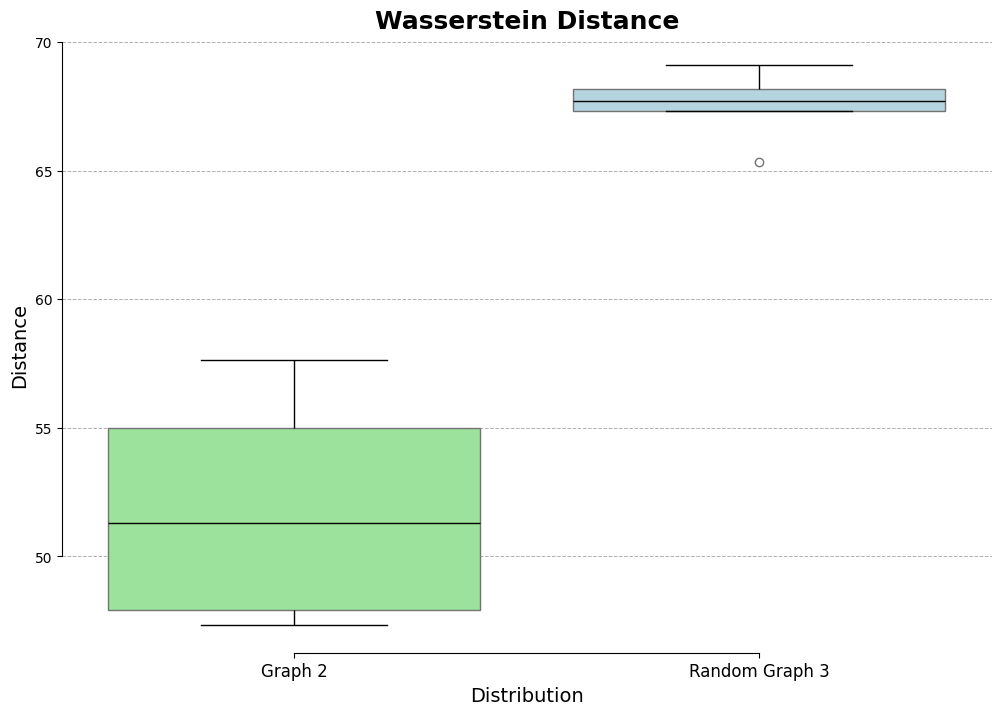

<Figure size 640x480 with 0 Axes>

In [7]:
# We will recreate the boxplot with colors for better visualization

# Define the palette to use for the boxplots
palette = ["lightgreen", "lightblue"]

# We will add the specified labels to the x-axis for each boxplot

# Define the labels for each boxplot
labels = ["Graph 2", "Random Graph 3"]

# Create the boxplot with colors and labels
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=dict_cost, palette=palette)

# Set the labels and titles
ax.set_title("Wasserstein Distance", fontsize=18, fontweight="bold")
ax.set_xlabel("Distribution", fontsize=14)
ax.set_ylabel("Distance", fontsize=14)

# Set the x-axis labels
ax.set_xticklabels(labels, fontsize=12)

# Improve the visual presentation
sns.despine(trim=True)
plt.setp(ax.artists, edgecolor="k")  # Set the edgecolor of the box to black
plt.setp(ax.lines, color="k")  # Set the color of the whiskers to black

# Add a horizontal grid for easier comparison
plt.grid(axis="y", linestyle="--", linewidth=0.7)

# Show the final result
plt.show()
plt.savefig("./images/Wassertein_G4.png")

# Experiment 3 : Comparison initialization on convergence

In [ ]:
# compute distance between all graphs in G1 with the constraint the the second graph is bigger than the first one
cfg = {
    "S": 10,
    "tau": 2,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 800,
    "kmax": 2,
}
from collections import defaultdict

dict_cost = defaultdict(list)
for j in range(10):
    for i in range(1, len(G3)):
        print(f"G{0} - G{i}")
        try:
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                G3[0], G3[i], cfg, True, False, False
            )
            dict_cost[f"G{0} - G{i}_normal"].append(np.median(list_cost_temp[-100:]))
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                G3[0], G3[i], cfg, True, False, True
            )
            dict_cost[f"G{0} - G{i}_xavier"].append(np.median(list_cost_temp[-100:]))
            eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
                G3[0], G3[i], cfg, True, True, False
            )
            dict_cost[f"G{0} - G{i}_scheduler"].append(np.median(list_cost_temp[-100:]))
        except:
            print(f"G{0} - G{i} : error")
            continue

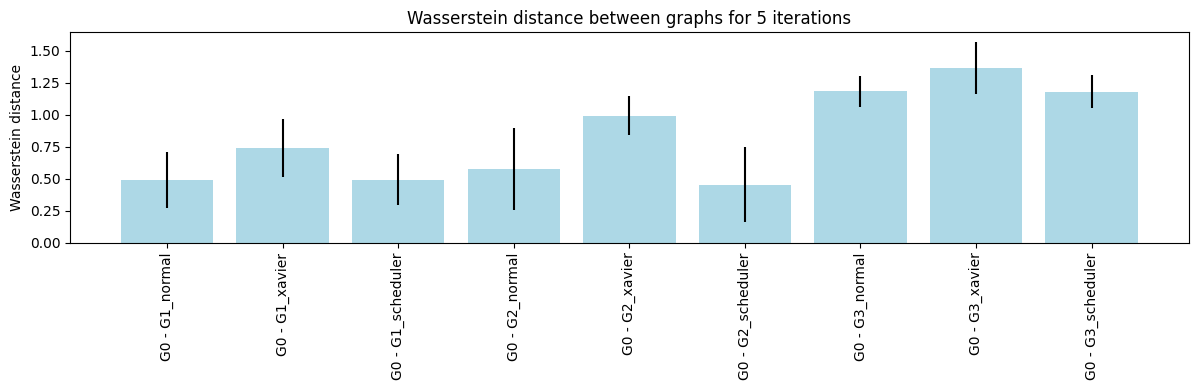

In [5]:
means = [np.mean(v) for v in dict_cost.values()]
stds = [np.std(v) for v in dict_cost.values()]

# Create the plot
plt.figure(figsize=(12, 4))
bars = plt.bar(dict_cost.keys(), means, yerr=stds, color="lightblue")

# Setting the aesthetic parameters
plt.xticks(rotation=90)
plt.ylabel("Wasserstein distance")
plt.title("Wasserstein distance between graphs for 5 iterations")
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping

# Save the plot to a file
plt.savefig("./images/Wassertein_G1.png")
plt.show()  # Show the plot as an output

# Experiment 4 : Evolution of alignement over iteration

<Figure size 600x1200 with 0 Axes>

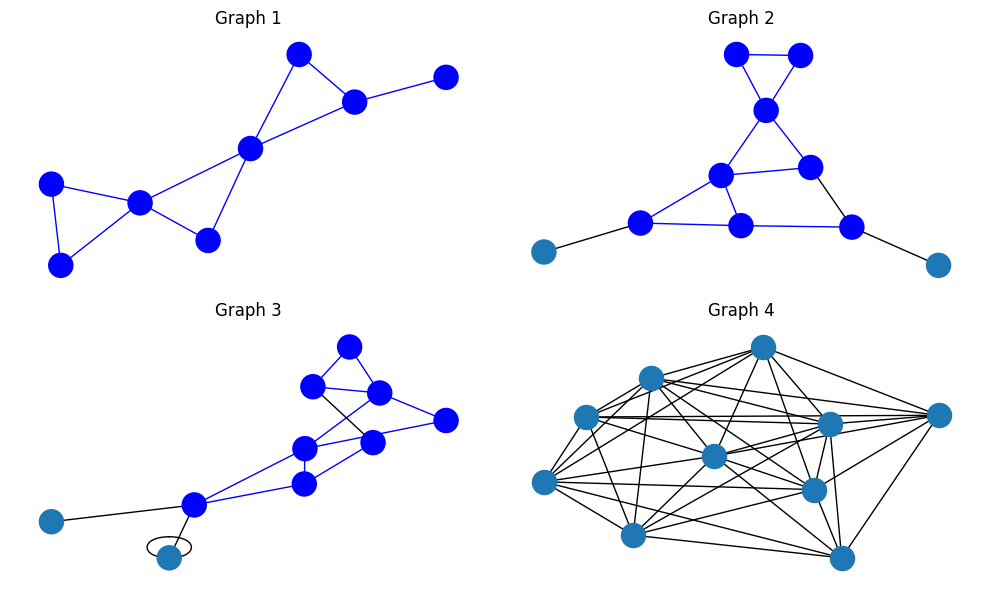

In [44]:
draw_graphs_with_edge_color(G3, True);

In [ ]:
cfg = {
    "S": 10,
    "tau": 2,
    "gamma": 1,
    "nb_iter_dykstra": 20,
    "nb_iter_grad": 1600,
    "kmax": 2,
}

eta, sigma, list_cost_temp, list_matrix_P = compute_Wasserstein_distance(
    G3[0], G3[2], cfg, True, False, False
)

In [54]:
fixed_positions_G2 = create_video_soft(
    G3[0],
    G3[2],
    list_matrix_P,
    node_labels_G1=None,
    node_labels_G2=None,
    filename="graph_evolution_soft_3.mp4",
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1200, 600) to (1200, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


In [55]:
create_video(
    G3[0],
    G3[2],
    list_matrix_P,
    node_labels_G1=None,
    node_labels_G2=None,
    filename="graph_evolution_same_3.mp4",
    fixed_positions_G2=fixed_positions_G2,
)

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1200, 600) to (1200, 608) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
